# Regularization methods
Ridge regularization method using gradient descent and stochastic gradient descent

In [1]:
import time

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt   
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

## Communities and Crime Data Preprocessing

In [2]:

data_path = "data/communities.data"
data = pd.read_csv(data_path, header=None, na_values=['?'])

# Reading attribute names from the .names file
def load_attribute_names(names_path):
    attribute_names = []
    with open(names_path, 'r') as f:
        for line in f:
            if line.startswith('@attribute'):
                attribute_name = line.split()[1]
                attribute_names.append(attribute_name)
    return attribute_names

names_path = "data/communities.names"
attribute_names = load_attribute_names(names_path)

data.columns = attribute_names

print(data.head())


   state  county  community        communityname  fold  population  \
0      8     NaN        NaN         Lakewoodcity     1        0.19   
1     53     NaN        NaN          Tukwilacity     1        0.00   
2     24     NaN        NaN         Aberdeentown     1        0.00   
3     34     5.0    81440.0  Willingborotownship     1        0.04   
4     42    95.0     6096.0    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06  

In [3]:
data = data.drop(data.columns[0:5], axis=1)

data = data.fillna(data.mean())

total_missing = data.isna().sum().sum()
print(f"Total missing values: {total_missing}")

y = data['ViolentCrimesPerPop']
X = data.drop(columns=['ViolentCrimesPerPop'])


Total missing values: 0


In [4]:
# since regularization methods like Ridge and Lasso are sensitive to the scale of the features, we need to normalize the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Ridge and Lasso Regression

Fit models using ridge and lasso regression. Try different values of the regularization
parameter and evaluate its effect. Choose the optimal regularization parameter and
discribe how you did it.

Alpha values:  [1.00000000e-03 4.64158883e-03 2.15443469e-02 1.00000000e-01
 4.64158883e-01 2.15443469e+00 1.00000000e+01 4.64158883e+01
 2.15443469e+02 1.00000000e+03]


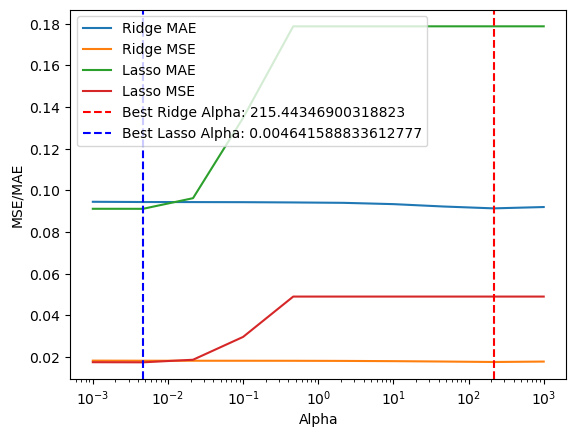

Best alpha for Ridge: 215.44346900318823
Best alpha for Lasso: 0.004641588833612777
Best Ridge Alpha: 215.44346900318823, MAE: 0.09133170124601857, MSE: 0.017491192593826397
Best Lasso Alpha: 0.004641588833612777, MAE: 0.09111247114704406, MSE: 0.017334253970267534


In [5]:


def fit_ridge(X_train, y_train, X_test, y_test, alpha):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    # print('\nRIDGE ---\nMAE: ', mae, '\nMSE: ', mse, '\nalpha: ', alpha)
    return mae, mse

def fit_lasso(X_train, y_train, X_test, y_test, alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    # print('\nLASSO --- \nMAE: ', mae, '\nMSE: ', mse, '\nalpha: ', alpha)
    return mae, mse

alpha_values = np.logspace(-3, 3, 10)
print("Alpha values: ", alpha_values)

ridge_mae_values = []
ridge_mse_values = []
lasso_mae_values = []
lasso_mse_values = []

for alpha in alpha_values:
    mae, mse = fit_ridge(X_train_scaled, y_train, X_test_scaled, y_test, alpha)
    ridge_mae_values.append(mae)
    ridge_mse_values.append(mse)

    mae, mse = fit_lasso(X_train_scaled, y_train, X_test_scaled, y_test, alpha)
    lasso_mae_values.append(mae)
    lasso_mse_values.append(mse)

best_ridge_alpha = alpha_values[np.argmin(ridge_mse_values)]
best_lasso_alpha = alpha_values[np.argmin(lasso_mse_values)]

plt.plot(alpha_values, ridge_mae_values, label='Ridge MAE')
plt.plot(alpha_values, ridge_mse_values, label='Ridge MSE')
plt.plot(alpha_values, lasso_mae_values, label='Lasso MAE')
plt.plot(alpha_values, lasso_mse_values, label='Lasso MSE')
plt.axvline(x=best_ridge_alpha, color='r', linestyle='--', label=f'Best Ridge Alpha: {best_ridge_alpha}')
plt.axvline(x=best_lasso_alpha, color='b', linestyle='--', label=f'Best Lasso Alpha: {best_lasso_alpha}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE/MAE')
plt.legend()
plt.show()

print(f"Best alpha for Ridge: {best_ridge_alpha}")
print(f"Best alpha for Lasso: {best_lasso_alpha}")

ridge_mae, ridge_mse = fit_ridge(X_train_scaled, y_train, X_test_scaled, y_test, best_ridge_alpha)
lasso_mae, lasso_mse = fit_lasso(X_train_scaled, y_train, X_test_scaled, y_test, best_lasso_alpha)

print(f"Best Ridge Alpha: {best_ridge_alpha}, MAE: {ridge_mae}, MSE: {ridge_mse}")
print(f"Best Lasso Alpha: {best_lasso_alpha}, MAE: {lasso_mae}, MSE: {lasso_mse}")

To choose the optimal regularization parameter I generated alpha values with the help of the function np.logspace(-3, 3, 10) which generates 10 values between 10^-3 and 10^3. This range was chosen to cover a wide spectrum of possible regularization strengths, from very small (almost no regularization) to very large (strong regularization). I then calculated the mean absolute error and mean squared error for each alpha value for both Ridge and Lasso regression. I chose the alpha value that minimizes the mean squared error for both Ridge and Lasso regression.

### Compare the attributes selected with forward attribute selection (the results from the previous assignment) with the attributes lasso selected.

In [6]:
# Forward attribute selection results from previous assignment

# ['PctKids2Par',
#  'racePctWhite',
#  'HousVacant',
#  'pctUrban',
#  'PctWorkMom',
#  'MalePctDivorce',
#  'PctIlleg',
#  'RacialMatchCommPol',
#  'NumStreet',
#  'PctHousOccup',
#  'population']

In [7]:
lasso = Lasso(alpha=best_lasso_alpha)
lasso.fit(X_train_scaled, y_train)
lasso_selected_features = X_train.columns[lasso.coef_ != 0]  # select features with non-zero coefficients
lasso_selected_features_list = lasso_selected_features.tolist()
print("Lasso selected features: ", lasso_selected_features_list)

Lasso selected features:  ['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban', 'pctWInvInc', 'AsianPerCap', 'OtherPerCap', 'PctEmplManu', 'MalePctDivorce', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'PctPersDenseHous', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn', 'PolicReqPerOffic', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'LemasPctOfficDrugUn']


#### Based on the comparison, we can conclude that:
- *Common Features*: The features racePctWhite, pctUrban, PctWorkMom, MalePctDivorce, PctIlleg, HousVacant, PctHousOccup, NumStreet, and RacialMatchCommPol were selected by both forward feature selection and Lasso regression, indicating their strong relevance to the target variable.
- *Unique to Forward Selection*: The feature population was selected only by forward feature selection, suggesting that this feature might provide incremental improvements in model performance that Lasso did not capture.
- *Unique to Lasso Regression*: The features racepctblack, agePct12t29, pctWInvInc, AsianPerCap, OtherPerCap, PctEmplManu, PctYoungKids2Par, PctPersDenseHous, PctVacantBoarded, MedRentPctHousInc, MedOwnCostPctIncNoMtg, PctForeignBorn, PolicReqPerOffic, PctPolicWhite, PctPolicBlack, and LemasPctOfficDrugUn were selected only by Lasso regression, indicating that Lasso's regularization might have identified these features as important while controlling for multicollinearity and overfitting.

## Wine quality dataset

In [14]:
wine_data_path = "data/winequality-white.csv"
wine_data = pd.read_csv(wine_data_path, header=0, sep=';')
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
total_missing = data.isna().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 0


In [15]:
y_wine = wine_data['quality']
X_wine = wine_data.drop(columns=['quality'])

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

scaler2 = StandardScaler()
X_wine_train_scaled = scaler2.fit_transform(X_wine_train)

X_wine_test_scaled = scaler2.transform(X_wine_test)

## Implement ridge regression with:
- gradient descent
- stochastic gradient descent

(Implement gradient descent from scratch)

In [17]:
def compute_cost(X, y, weights, bias, alpha):
    y_pred = np.dot(X, weights) + bias
    rss = ((y_pred - y) ** 2)
    regularization = alpha * np.sum(weights ** 2) / 2
    return np.mean(rss) + regularization  # Use mean of RSS for better scale

In [50]:

class RidgeRegressionGD:
    def __init__(self, alpha=0.1, learning_rate=0.01, max_iter=1000, target_cost=0.20):
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.target_cost = target_cost  
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        dw_list = []  # to store the gradient norm at each iteration
        cost_list = []  # to store the cost at each iteration

        for iteration in range(self.max_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            # Compute gradient with respect to weights/coefficients
            dw = (1 / n_samples) * (np.dot(X.T, error) + self.alpha * self.weights)
            # Compute gradient with respect to bias/intercept
            db = (1 / n_samples) * np.sum(error)

            dw_list.append(np.linalg.norm(dw))
            cost = compute_cost(X, y, self.weights, self.bias, self.alpha)
            cost_list.append(cost)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if cost < self.target_cost:
                print(f"Converged at iteration {iteration} with cost {cost:.4f}")
                break

        return dw_list, cost_list 

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


ridge_gd = RidgeRegressionGD(alpha=0.1, learning_rate=0.01, max_iter=1000)
start_time_gd = time.time()
dw_list, cost_list = ridge_gd.fit(X_wine_train_scaled, y_wine_train)
gd_time = time.time() - start_time_gd

y_pred_gd = ridge_gd.predict(X_wine_test_scaled)
gd_mse = mean_squared_error(y_wine_test, y_pred_gd)


gd_time, gd_mse, ridge_gd.weights


(1.52471923828125,
 0.5769993768811096,
 array([-0.01562188, -0.19863403, -0.00897486,  0.20977688, -0.0110417 ,
         0.09715448, -0.02355857, -0.14172276,  0.04566632,  0.06098902,
         0.38416623]))

In [57]:

class RidgeRegressionSGD:
    def __init__(self, alpha=0.1, learning_rate=0.01, max_iter=1000, target_cost=0.20):
        self.alpha = alpha 
        self.learning_rate = learning_rate  
        self.max_iter = max_iter  
        self.target_cost = target_cost
        self.weights = None  
        self.bias = None 

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) 
        self.bias = 0
        dw_list = []  
        cost_list = []  

        for iteration in range(self.max_iter):
            # Shuffle the data at the start of each iteration
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(n_samples):
                xi = X_shuffled[i, :]
                yi = y_shuffled[i]

                y_pred = np.dot(xi, self.weights) + self.bias
                error = y_pred - yi

                # Compute gradient with respect to weights
                dw = xi * error + self.alpha * self.weights
                # Compute gradient with respect to bias
                db = error

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            cost = compute_cost(X, y, self.weights, self.bias, self.alpha)
            dw_list.append(np.linalg.norm(dw))  
            cost_list.append(cost)  # Cost after one full iteration
            
            if cost < self.target_cost:
                print(f"Converged at iteration {iteration} with cost {cost:.4f}")
                break
            
        return dw_list, cost_list 

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


X_wine_train_scaled_np = np.array(X_wine_train_scaled)
y_wine_train_np = np.array(y_wine_train)
X_wine_test_scaled_np = np.array(X_wine_test_scaled)
y_wine_test_np = np.array(y_wine_test)

ridge_sgd = RidgeRegressionSGD(alpha=0.1, learning_rate=0.01, max_iter=1000)

start_time_sgd = time.time()
dw_list_sgd, cost_list_sgd = ridge_sgd.fit(X_wine_train_scaled_np, y_wine_train_np)
sgd_time = time.time() - start_time_sgd 

y_pred_sgd = ridge_sgd.predict(X_wine_test_scaled_np)
sgd_mse = mean_squared_error(y_wine_test_np, y_pred_sgd) 

# sgd_time, sgd_mse, ridge_sgd.weights, cost_list_sgd


### Test different learning rates and try to find the optimal one.  

In [58]:
learning_rates = [0.0001, 0.001, 0.01, 0.05]
gd_results = []
sgd_results = []

for lr in learning_rates:
    ridge_gd = RidgeRegressionGD(alpha=0.1, learning_rate=lr, max_iter=1000)
    start_time = time.time()
    ridge_gd.fit(X_wine_train_scaled, y_wine_train)
    gd_time = time.time() - start_time
    y_pred_gd = ridge_gd.predict(X_wine_test_scaled)
    gd_mse = mean_squared_error(y_wine_test, y_pred_gd)
    gd_results.append((lr, gd_time, gd_mse))

    ridge_sgd = RidgeRegressionSGD(alpha=0.1, learning_rate=lr, max_iter=1000)
    start_time_sgd = time.time()
    ridge_sgd.fit(X_wine_train_scaled_np, y_wine_train_np)
    sgd_time = time.time() - start_time_sgd
    y_pred_sgd = ridge_sgd.predict(X_wine_test_scaled_np)
    sgd_mse = mean_squared_error(y_wine_test_np, y_pred_sgd)
    sgd_results.append((lr, sgd_time, sgd_mse))

print(gd_results)
print(sgd_results)


[(0.0001, 1.278346300125122, 29.254379667726184), (0.001, 1.440765380859375, 5.32351124450824), (0.01, 1.1279020309448242, 0.5769993768811096), (0.05, 1.5417101383209229, 0.5720831578484635)]
[(0.0001, 16.86161708831787, 0.5756056522335076), (0.001, 17.31751585006714, 0.5763442143725336), (0.01, 17.121301651000977, 0.584505317747526), (0.05, 23.469948053359985, 0.662610979317168)]


In [66]:
# Find the optimal learning rate for Gradient Descent by the smallest MSE 
optimal_gd_lr = min(gd_results, key=lambda x: x[2])  
optimal_gd_lr_value, gd_time, gd_mse = optimal_gd_lr

# Find the optimal learning rate for Stochastic Gradient Descent by the smallest MSE
optimal_sgd_lr = min(sgd_results, key=lambda x: x[2])  
optimal_sgd_lr_value, sgd_time, sgd_mse = optimal_sgd_lr

print(f"Optimal learning rate for Gradient Descent: {optimal_gd_lr_value} with MSE: {gd_mse:.4f} and time: {gd_time:.4f} seconds")
print(f"Optimal learning rate for Stochastic Gradient Descent: {optimal_sgd_lr_value} with MSE: {sgd_mse:.4f} and time: {sgd_time:.4f} seconds")


Optimal learning rate for Gradient Descent: 0.05 with MSE: 0.5721 and time: 1.5417 seconds
Optimal learning rate for Stochastic Gradient Descent: 0.0001 with MSE: 0.5756 and time: 16.8616 seconds


### Compare the time to convergence and the results of the two gradient descents you implemented

In [63]:
# data structure: (learning_rate, convergence_time, MSE)

best_gd = min(gd_results, key=lambda x: x[2])  # Minimum MSE for GD
best_sgd = min(sgd_results, key=lambda x: x[2])  # Minimum MSE for SGD

comparison_summary = {
    "Gradient Descent (GD)": {
        "Best Learning Rate": best_gd[0],
        "Convergence Time (s)": best_gd[1],
        "Best MSE": best_gd[2],
        "Minimum cost": min(cost_list)
    },
    "Stochastic Gradient Descent (SGD)": {
        "Best Learning Rate": best_sgd[0],
        "Convergence Time (s)": best_sgd[1],
        "Best MSE": best_sgd[2],
        "Minimum cost": min(cost_list_sgd)
    }
}

comparison_summary


{'Gradient Descent (GD)': {'Best Learning Rate': 0.05,
  'Convergence Time (s)': 1.5417101383209229,
  'Best MSE': 0.5720831578484635,
  'Minimum cost': 0.5780360352677423},
 'Stochastic Gradient Descent (SGD)': {'Best Learning Rate': 0.0001,
  'Convergence Time (s)': 16.86161708831787,
  'Best MSE': 0.5756056522335076,
  'Minimum cost': 0.5850196901514729}}

### Visualization of the results of the two gradient descents implemented

#### 1. Plotting the gradient descent progress in 3D and the cost function over iterations in 2D

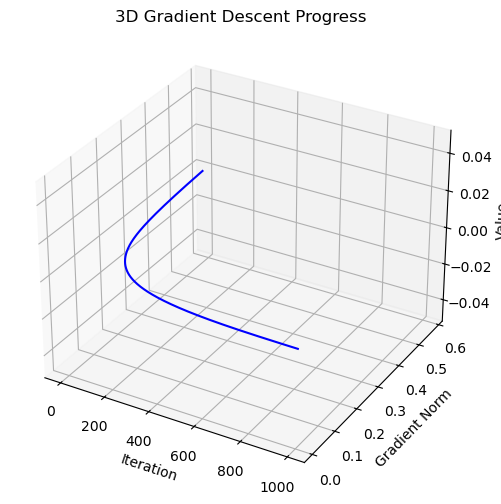

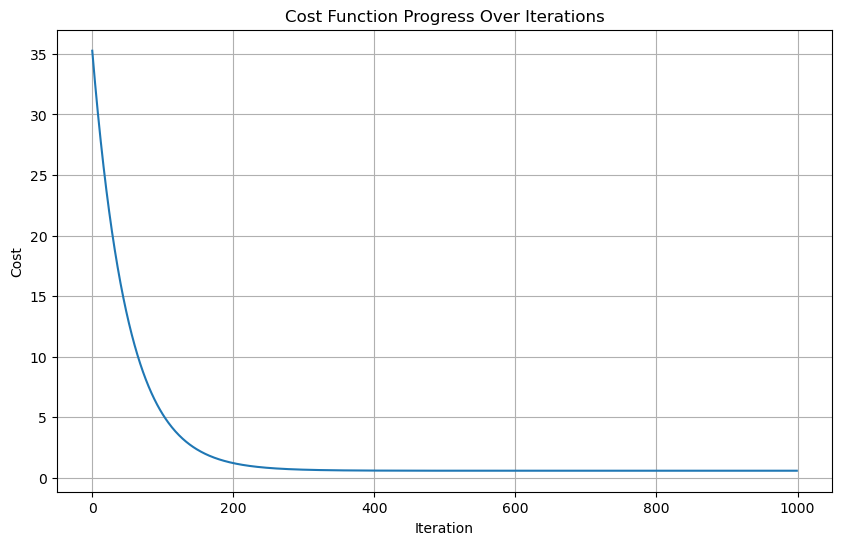

In [64]:
dw_array = np.array(dw_list)

# Create a 3D plot of the gradient norms over iterations
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(range(len(dw_array)), dw_array, label='Gradient Norm', color='b')

ax.set_xlabel('Iteration')
ax.set_ylabel('Gradient Norm')
ax.set_zlabel('Value')

ax.set_title('3D Gradient Descent Progress')
plt.show()

# Plotting the cost function over iterations in 2D
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_list)), cost_list, label='Cost Function (RSS + Regularization)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Progress Over Iterations')
plt.grid(True)
plt.show()

#### 2. Plotting the stochastic gradient descent progress in 3D and the cost function over epochs in 2D

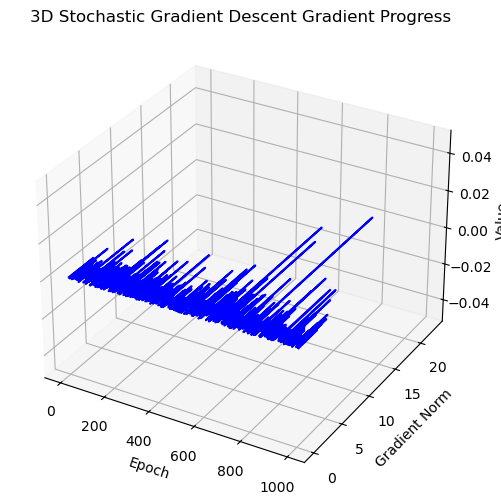

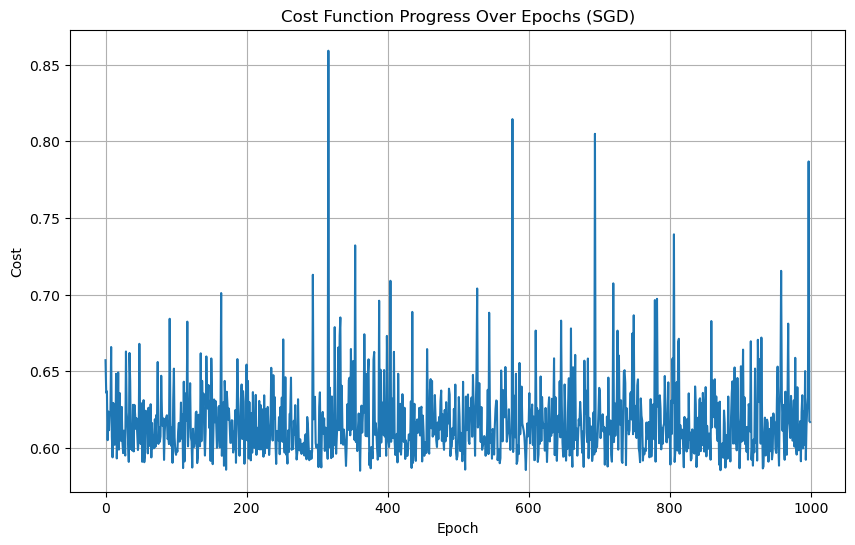

Total number of epochs: 1000
Minimum cost: 0.5850196901514729


In [65]:

dw_array_sgd = np.array(dw_list_sgd)

# 3D plot for gradient norms over epochs/iterations
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(range(len(dw_array_sgd)), dw_array_sgd, zs=0, zdir='z', label='Gradient Norm', color='b')

ax.set_xlabel('Epoch')
ax.set_ylabel('Gradient Norm')
ax.set_zlabel('Value')
ax.set_title('3D Stochastic Gradient Descent Gradient Progress')
plt.show()

# Plotting the cost function over epochs/iterations in 2D
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_list_sgd)), cost_list_sgd, label='Cost Function (RSS + Regularization)')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function Progress Over Epochs (SGD)')
plt.grid(True)
plt.show()

print('Total number of epochs:' ,len(cost_list_sgd))
print('Minimum cost:',min(cost_list_sgd))
